In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados Experimentais

Dados extraídos do artigo original. É dito que o SCO acontece de um estado s = 0 (LS) para s = 2 (HS) e que a variação de volume é 48 $\pm$ 4 A³. A variação de pressão

In [59]:
# A massa molar, extraída da foŕmula quimica que o artigo passa é:
M = 0.540273 #kg/mol

In [2]:
delta_S_p2_rev_comp = pd.read_csv("delta_S_p2_rev_comp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})
delta_S_p2_rev_decomp = pd.read_csv("delta_S_p2_rev_decomp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})
delta_S_p2_comp = pd.read_csv("delta_S_p2_comp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})
delta_S_p2_decomp = pd.read_csv("delta_S_p2_decomp.csv",header = None).rename(columns={0:"T(K)",1:"DS(J/kgK)"})

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3695/3286404056.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$ S (J/Kg$\cdot$K)")


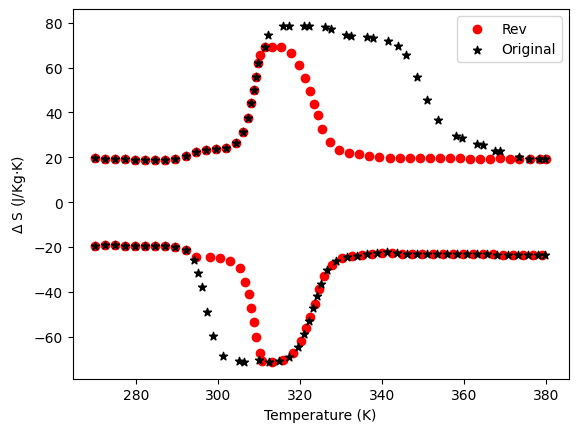

In [3]:
plt.scatter(delta_S_p2_rev_comp['T(K)'],delta_S_p2_rev_comp['DS(J/kgK)'],color = 'red',label='Rev')
plt.scatter(delta_S_p2_rev_decomp['T(K)'],delta_S_p2_rev_decomp['DS(J/kgK)'],color='red')

plt.scatter(delta_S_p2_comp['T(K)'],delta_S_p2_comp['DS(J/kgK)'],color='black',marker='*',label='Original')
plt.scatter(delta_S_p2_decomp['T(K)'],delta_S_p2_decomp['DS(J/kgK)'],color='black',marker='*')

plt.xlabel("Temperature (K)")
plt.ylabel("$\Delta$ S (J/Kg$\cdot$K)")

plt.legend()
plt.show()

In [8]:
# Aqui, quero ver em que temperatura do delta S ocorre para que eu possa fitar os parâmetros g, T_0 e Delta_0 da fração de moléculas HS.

id_max = np.argmax(delta_S_p2_rev_comp['DS(J/kgK)'])
print("A temperatura em que ocorre o máximo é:",delta_S_p2_rev_comp['T(K)'][id_max])

A temperatura em que ocorre o máximo é: 313.22033898305085


# Fração de Moléculas HS

Aqui, eu manipulei o g, T_0 e delta_0 de maneira que dn/dT à pressão ambiente tivesse um pico em torno de 300K, já que o artigo cita que em pressão ambiente a transição SCO acontece em torno desta temperatura. Outro detalhe é que usei o fato de o pico da variação da entropia do artigo ocorre em torno de 313K, então eu usei o delta_S_spin de maneira que eu atingisse esse mesmo número. Fiz isso no arquivo "Teste_Parâmetros_Livres". De resto eu tirei o delta_V do artigo e os valores da pressão aplicada também.

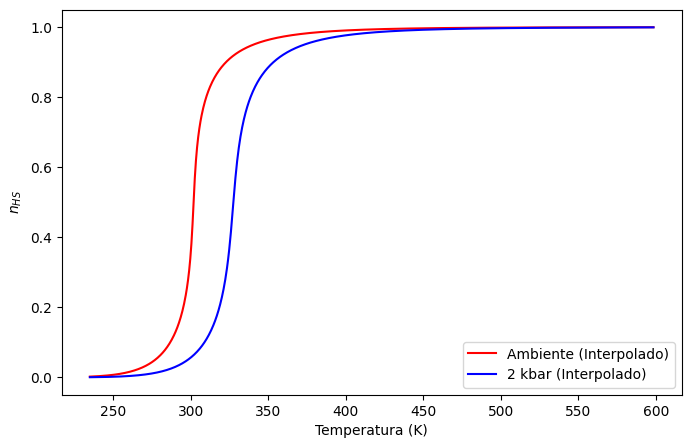

In [48]:
# Parâmetros
g = 871 # Adimensional
T_0 = 266 # Em Kelvin
#T_0 = 262
Delta_0 = 2043 # Em Kelvin
delta_V = 48e-30 # A unidade dá em metros ao cubo.
k_B = 1.380649e-23 # Em J/K

def T(m, delta_0, delta_V, P, g, T0):
#    P_linha = (((delta_V)**(1/3)) * P) / 4
    P_linha = (((delta_V) * P)) / 4
    #gamma = (k_B * delta_0 + P_linha * (delta_V**3)) / (k_B * T0)
    gamma = (delta_0 + P_linha/k_B) / (T0)
    numerator = 2 * (m - gamma)
    denominator = np.log((m + 1) / (g**2 * (1 - m)))
    return T0 * (numerator / denominator)

# Varredura original em m
m_amb = np.linspace(-0.999, 0.999, 10000)
m_2kbar = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 200e6, g, T_0)

n_hs_amb = (m_amb + 1) / 2
n_hs_2kbar = (m_2kbar + 1) / 2

# Define um grid comum de temperatura (exemplo: de 1K a 300K)
T_min = max(np.min(Temp_amb), np.min(Temp_2kbar))
T_max = min(np.max(Temp_amb), np.max(Temp_2kbar))
T_common = np.linspace(T_min, T_max, 1000)

# Interpolação para obter n_hs em T_common
n_hs_amb_interp = np.interp(T_common, Temp_amb, n_hs_amb)
n_hs_2kbar_interp = np.interp(T_common, Temp_2kbar, n_hs_2kbar)

m_amb = np.linspace(-0.999, 0.999, 10000)
m_2kbar = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 200e6, g, T_0)
n_hs_amb = (m_amb + 1) / 2
n_hs_2kbar = (m_2kbar + 1) / 2


# Plot
plt.figure(figsize=(8,5))

#plt.plot(Temp_amb, n_hs_amb, label='Ambiente',linestyle='--',color='red')
#plt.plot(Temp_2kbar, n_hs_2kbar, label='2 kbar',linestyle='--',color='blue')

plt.plot(T_common, n_hs_amb_interp, label='Ambiente (Interpolado)',color='red')
plt.plot(T_common, n_hs_2kbar_interp, label='2 kbar (Interpolado)',color='blue')


plt.xlabel('Temperatura (K)')
plt.ylabel(r'$n_{HS}$')
plt.legend()
plt.show()

# Entropia de configuração

A equação para entropia de configuração é:

#### $S_C(P,T) = -R \left \{ n_{HS} \ln(n_{hs}) + (1-n_{hs})\ln(1-n_{hs})\right \}$

onde o $n_{hs}$ é obtido no bloco anterior.

In [65]:
R = 8.314 # Em J/molK

def S_C(n_hs):
    S = -R*(n_hs*np.log(n_hs) + (1-n_hs)*np.log(1-n_hs))
    return S

#S_C_amb = S_C((m_amb+1)/2)

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3695/1252415824.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(T_common,delta_S_Config/M,label='$\Delta S_{config}$')
/tmp/ipykernel_3695/1252415824.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Entropia (J/kg$ \cdot $K)')


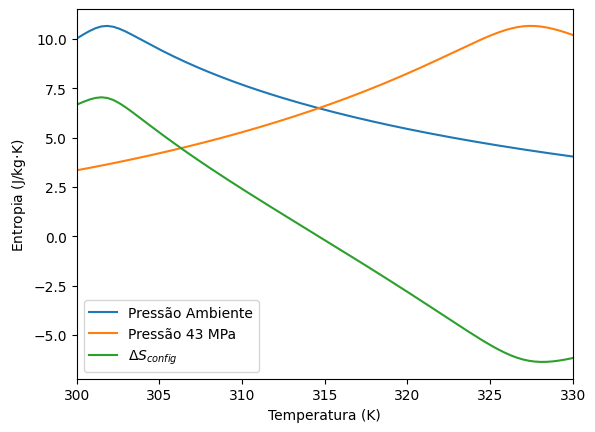

In [137]:
S_C_amb = S_C(n_hs_amb_interp)
S_C_2kbar = S_C(n_hs_2kbar_interp)
delta_S_Config = -(S_C_2kbar-S_C_amb)

#Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
#Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 43e6, g, T_0)
#S_C_amb_teste = S_C(n_hs_amb)
#S_C_2kbar_teste = S_C(n_hs_2kbar)

#plt.plot(Temp_amb,S_C_amb_teste, label='Pressão Ambiente Teste')
#plt.plot(Temp_2kbar,S_C_2kbar_teste, label='Pressão 43 MPa Teste')

plt.plot(T_common,S_C_amb/M, label='Pressão Ambiente')
plt.plot(T_common,S_C_2kbar/M, label='Pressão 43 MPa')
plt.plot(T_common,delta_S_Config/M,label='$\Delta S_{config}$')

#plt.ylim(-3,10)
plt.xlim(300,330)
plt.ylabel('Entropia (J/kg$ \cdot $K)')
plt.xlabel('Temperatura (K)')
plt.legend()
plt.show()

# Entropia de Spin

Aqui teremos que:

$S_S(P,T,B) = n_{HS}S^{HS}_S(T,B) - (1-n_{HS})S^{LS}_S(T,B)$

onde

$S_S^i(T,B) = R (\ln{(Z)} - x_i m_i)$

$Z = \sinh{(a_i x_i)}/\sinh{(b_i x_i)}$

$a_i = 1+b_i$

$b_i = 1/2j_i$

$x_i = g_i J_i \beta \mu_B B$

Note que no artigo original é dado que $S_{HS} = 2$ e $S_{LS} = 0$ para o Ferro $d^6$. Assim ocorre o quench total do estado LS. Já no caso HS isso não é verdade porque tem quatro elétrons desemparelhados. E então tecnicamente teria uma contribuição pro L? De qualquer modo nos cálculos abaixo eu considerei que L = 0 e então somente o spin contribui. Em ambos os casos em que L = 0 temos então que J = S, logo $g_i = 2$ para ambos os casos. Como $J_{LS} = 0$ então o estado LS não vai contribuir. O valor do campo magnético eu coloquei qualquer um: testei 0.01, 0.1 e 1 T e não muda em nada o deltaS. Na última frase. Como no final tem que somar todas as contribuições, então apliquei a temperatura obtida via interpolação.

In [138]:
def S_S(T, g_J, J, B):
    """
    Calcula a entropia magnética (em J/mol·K) de um paramagneto ideal de spin J.

    Entradas:
    - T : Temperatura (K)
    - g_J : Fator de Landé
    - J : Momento total de spin
    - B : Campo magnético (Tesla)

    Saída:
    - S : Entropia (J/mol·K)
    """
    k_B = 1.380649e-23      # J/K
    mu_B = 9.2740100783e-24 # J/T
    R = 8.314462618         # J/mol·K

    x = (g_J * mu_B * J * B) / (k_B * T)

    num = np.sinh((2 * J + 1) * x / (2 * J))
    den = np.sinh(x / (2 * J))
    Z = num / den

    coeff = (2 * J + 1) / (2 * J)
    B_J = (coeff / np.tanh(coeff * x)) - (1 / (2 * J * np.tanh(x / (2 * J))))

    S = R * (np.log(Z) + x * B_J)
    return S


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3695/1883637381.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(T_common, delta_S_Spin/M,label='$\Delta S_{spin}$')
/tmp/ipykernel_3695/1883637381.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(T_common,delta_S_Config/M,label='$\Delta S_{config}$')
/tmp/ipykernel_3695/1883637381.py:12: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(T_common,delta_S_Config/M+delta_S_Spin/M,label='$\Delta S_{soma}$=$\Delta S_{spin}$+$\Delta S_{config}$')
/tmp/ipykernel_3695/1883637381.py:16: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Entr

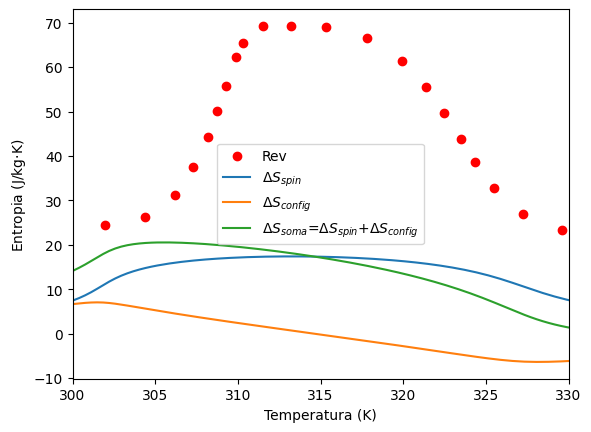

In [141]:
S_S_amb = n_hs_amb_interp*S_S(T_common, 2, 2,0.01)
S_S_2kbar = n_hs_2kbar_interp*S_S(T_common, 2, 2,0.01)

delta_S_Spin = -(S_S_2kbar - S_S_amb)

#plt.plot(T_common,S_S_amb/M,label='Pressão ambiente')
#plt.plot(T_common,S_S_2kbar/M,label='Pressão 2kbar')

plt.scatter(delta_S_p2_rev_comp['T(K)'],delta_S_p2_rev_comp['DS(J/kgK)'],color = 'red',label='Rev')
plt.plot(T_common, delta_S_Spin/M,label='$\Delta S_{spin}$')
plt.plot(T_common,delta_S_Config/M,label='$\Delta S_{config}$')
plt.plot(T_common,delta_S_Config/M+delta_S_Spin/M,label='$\Delta S_{soma}$=$\Delta S_{spin}$+$\Delta S_{config}$')

#plt.ylim(-3,10)
plt.xlim(300,330)
plt.ylabel('Entropia (J/kg$ \cdot $K)')
plt.xlabel('Temperatura (K)')

plt.legend()
plt.show()



In [54]:
id_max = np.argmax(delta_S_Spin)
print("A variação de entropia máxima é:",max(delta_S_Spin))
print("A temperatura em que ocorre o máximo é:",T_common[id_max])

A variação de entropia máxima é: 9.396994356693103
A temperatura em que ocorre o máximo é: 313.1410744500218


# Entropia de vibração: Termos ópticos

Aqui temos:

## $S_O(T,P) = n_{HS}S_O^{HS} + (1-n_{HS})S_O^{LS}$

onde 

## $S^i_O (T) = R \sum_{\nu} \left \{-\ln{(1-e^{-\beta \hbar \omega^i_\nu})}   + \frac{\beta \hbar \omega^i_\nu}{e^{\beta \hbar \omega^i_\nu - 1}}         \right \}$

Aqui os valores de frequência que eu utilizei foram os valores médios dados por (1450,900 e 72) e (1450,900,264), que foram valores teste que coloquei. Preciso das frequências reais dessa molécula.

<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3695/3055739855.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(T_common,delta_S_O/M,label='$\Delta S_{opt}$')


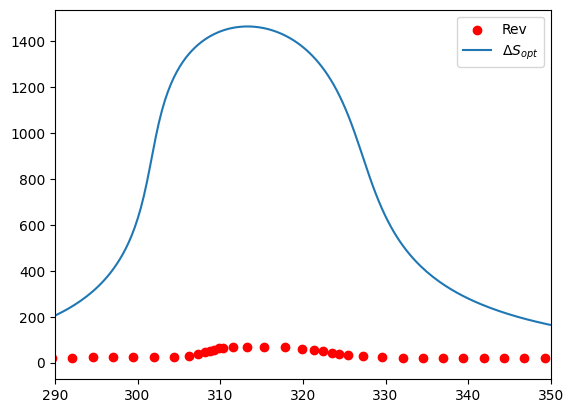

In [155]:
import numpy as np
import matplotlib.pyplot as plt

def S_O(limite_soma, T, frequencias_cm):
    """
    Calcula a expressão da imagem com frequências em cm^-1.

    Parâmetros:
    limite_soma (int): Número de termos da soma.
    T (float): Temperatura em Kelvin.
    frequencias_cm (list ou array): Lista de frequências (em cm^-1).

    Retorno:
    float: Valor da expressão (J/mol·K).
    """
    k_B = 1.380649e-23       # J/K
    hbar = 1.054571817e-34   # J.s
    c = 1        # 
    R = 8.314462618          # J/mol·K

    beta = 1 / (k_B * T)
    soma = 0.0

    if len(frequencias_cm) != limite_soma:
        raise ValueError(f"O número de frequências ({len(frequencias_cm)}) não bate com o limite da soma ({limite_soma}).")

    for omega_cm in frequencias_cm:
        omega = 2 * np.pi * c * omega_cm  # Convertendo de cm^-1 para rad/s
        x = beta * hbar * omega

        if x == 0:
            continue  # Evita divisão por zero

        termo_log = -np.log(1 - np.exp(-x))
        termo_fracao = x / (np.exp(x) - 1)

        soma += termo_log + termo_fracao

    return R * soma/M

# Parâmetros para o gráfico

frequencias_HS = [1450,900,72]
frequencias_LS = [1450,900,264]

limite_soma = 3
temperaturas = T_common  # Temperaturas de 10K a 500K

# Calculando S para cada temperatura
#S_valores = [S_O(limite_soma, T, frequencias_cm) for T in temperaturas]
S_O_HS = [S_O(limite_soma, T, frequencias_HS) for T in temperaturas]
S_O_LS = [S_O(limite_soma, T, frequencias_LS) for T in temperaturas]

S_O_2kbar = n_hs_2kbar_interp*S_O_HS + (1-n_hs_2kbar_interp)*S_O_LS
S_O_amb =  n_hs_amb_interp*S_O_HS + (1-n_hs_2kbar_interp)*S_O_LS
delta_S_O = -(S_O_2kbar-S_O_amb)

plt.xlim(290,350)
plt.scatter(delta_S_p2_rev_comp['T(K)'],delta_S_p2_rev_comp['DS(J/kgK)'],color = 'red',label='Rev')
plt.plot(T_common,delta_S_O/M,label='$\Delta S_{opt}$')
plt.legend()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3695/4279858518.py:2: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(T_common,delta_S_Config/M+delta_S_Spin/M+delta_S_O/15,label='$\Delta S_{soma}$=$\Delta S_{spin}$+$\Delta S_{config}$ + $\Delta S_{opt}$')
/tmp/ipykernel_3695/4279858518.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta S$ (J/kg$\cdot$K)')


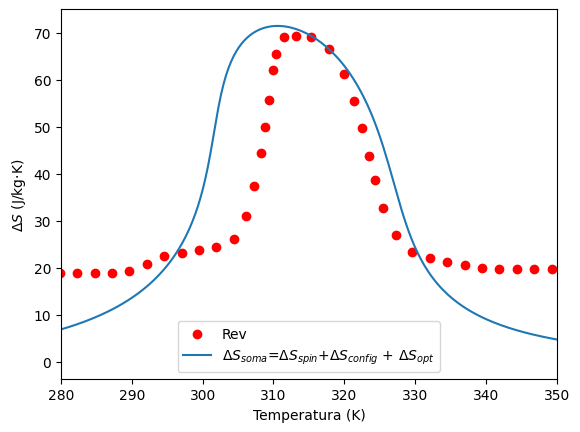

In [165]:
plt.scatter(delta_S_p2_rev_comp['T(K)'],delta_S_p2_rev_comp['DS(J/kgK)'],color = 'red',label='Rev')
plt.plot(T_common,delta_S_Config/M+delta_S_Spin/M+delta_S_O/15,label='$\Delta S_{soma}$=$\Delta S_{spin}$+$\Delta S_{config}$ + $\Delta S_{opt}$')


plt.ylabel('$\Delta S$ (J/kg$\cdot$K)')
plt.xlabel('Temperatura (K)')
plt.xlim(280,350)
plt.legend()
plt.show()

In [168]:
import numpy as np

# Total - Teórico
total = (delta_S_O + delta_S_Spin + delta_S_Config) 
T_max_total = (T_common)[np.argmax(total)]

# Óptico
optico = delta_S_O 
T_max_optico = (T_common)[np.argmax(optico)]

# Spin
spin = delta_S_Spin
T_max_spin = (T_common)[np.argmax(spin)]

# Configuração
config = delta_S_Config
T_max_config = (T_common)[np.argmax(config)]

# Resultado
print("T_max (Total teórico)     =", T_max_total)
print("T_max (Óptico)             =", T_max_optico)
print("T_max (Spin)               =", T_max_spin)
print("T_max (Configuração)       =", T_max_config)


T_max (Total teórico)     = 313.1410744500218
T_max (Óptico)             = 313.1410744500218
T_max (Spin)               = 313.1410744500218
T_max (Configuração)       = 301.4917955565444
